**Bemorga dori tavsiya qilish tizimi**

Tasavvur qiling, siz taqdiqot uchun ma'lumot to'playotgan tibbiy taqdiiqotchisiz. Siz bir xil kasallikdan aziyat chekkkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasalik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. Ushbu muammo ko'p toifali klassifikator (multi classification) yordamida hal qilinadi.

Model yaratish uchun Decison Tree algoritmidan foydalanamiz.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [6]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
40,73,F,NORMAL,HIGH,19.221,drugY
160,30,F,NORMAL,HIGH,10.443,drugX
25,28,F,HIGH,NORMAL,18.809,drugY
182,20,F,LOW,NORMAL,11.686,drugX
114,20,F,NORMAL,NORMAL,9.281,drugX
59,34,M,HIGH,HIGH,18.703,drugY
176,48,M,HIGH,NORMAL,10.446,drugA
15,16,F,HIGH,NORMAL,15.516,drugY
158,59,F,LOW,HIGH,10.444,drugC
41,58,F,HIGH,NORMAL,14.239,drugB


Ustunlar:

Age - yosh

Sex - jins

BP - qon bosimi

Cholesterol - qondagi xolesterol

Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati

**Matnli ustunlarga ishlov beramiz**

Ularni raqamga aylantiramiz

In [7]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
114,20,0,2,1,9.281,drugX
105,37,1,1,1,8.968,drugX
179,67,0,2,0,15.891,drugY
107,42,1,1,0,20.013,drugY
171,45,1,1,1,10.017,drugX
167,57,0,2,0,14.216,drugX
8,60,1,2,0,15.171,drugY
127,35,1,2,1,7.845,drugX
103,56,1,2,0,8.966,drugX
147,26,0,0,1,12.307,drugA


Bulardan **X** va **y** ni ajratib olamiz

In [8]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [9]:
y = df['Drug'].values

**Train/test split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
# bazani 0.4 yani 40% olinayapdi

**Model**

In [12]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train) #modelni tarbiyalash

DecisionTreeClassifier()

**Baholash**

In [13]:
y_predict = tree_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [16]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


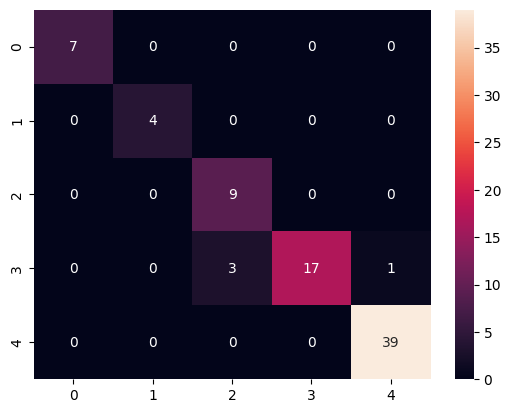

In [18]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [20]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



**Decision Tree chizamiz**

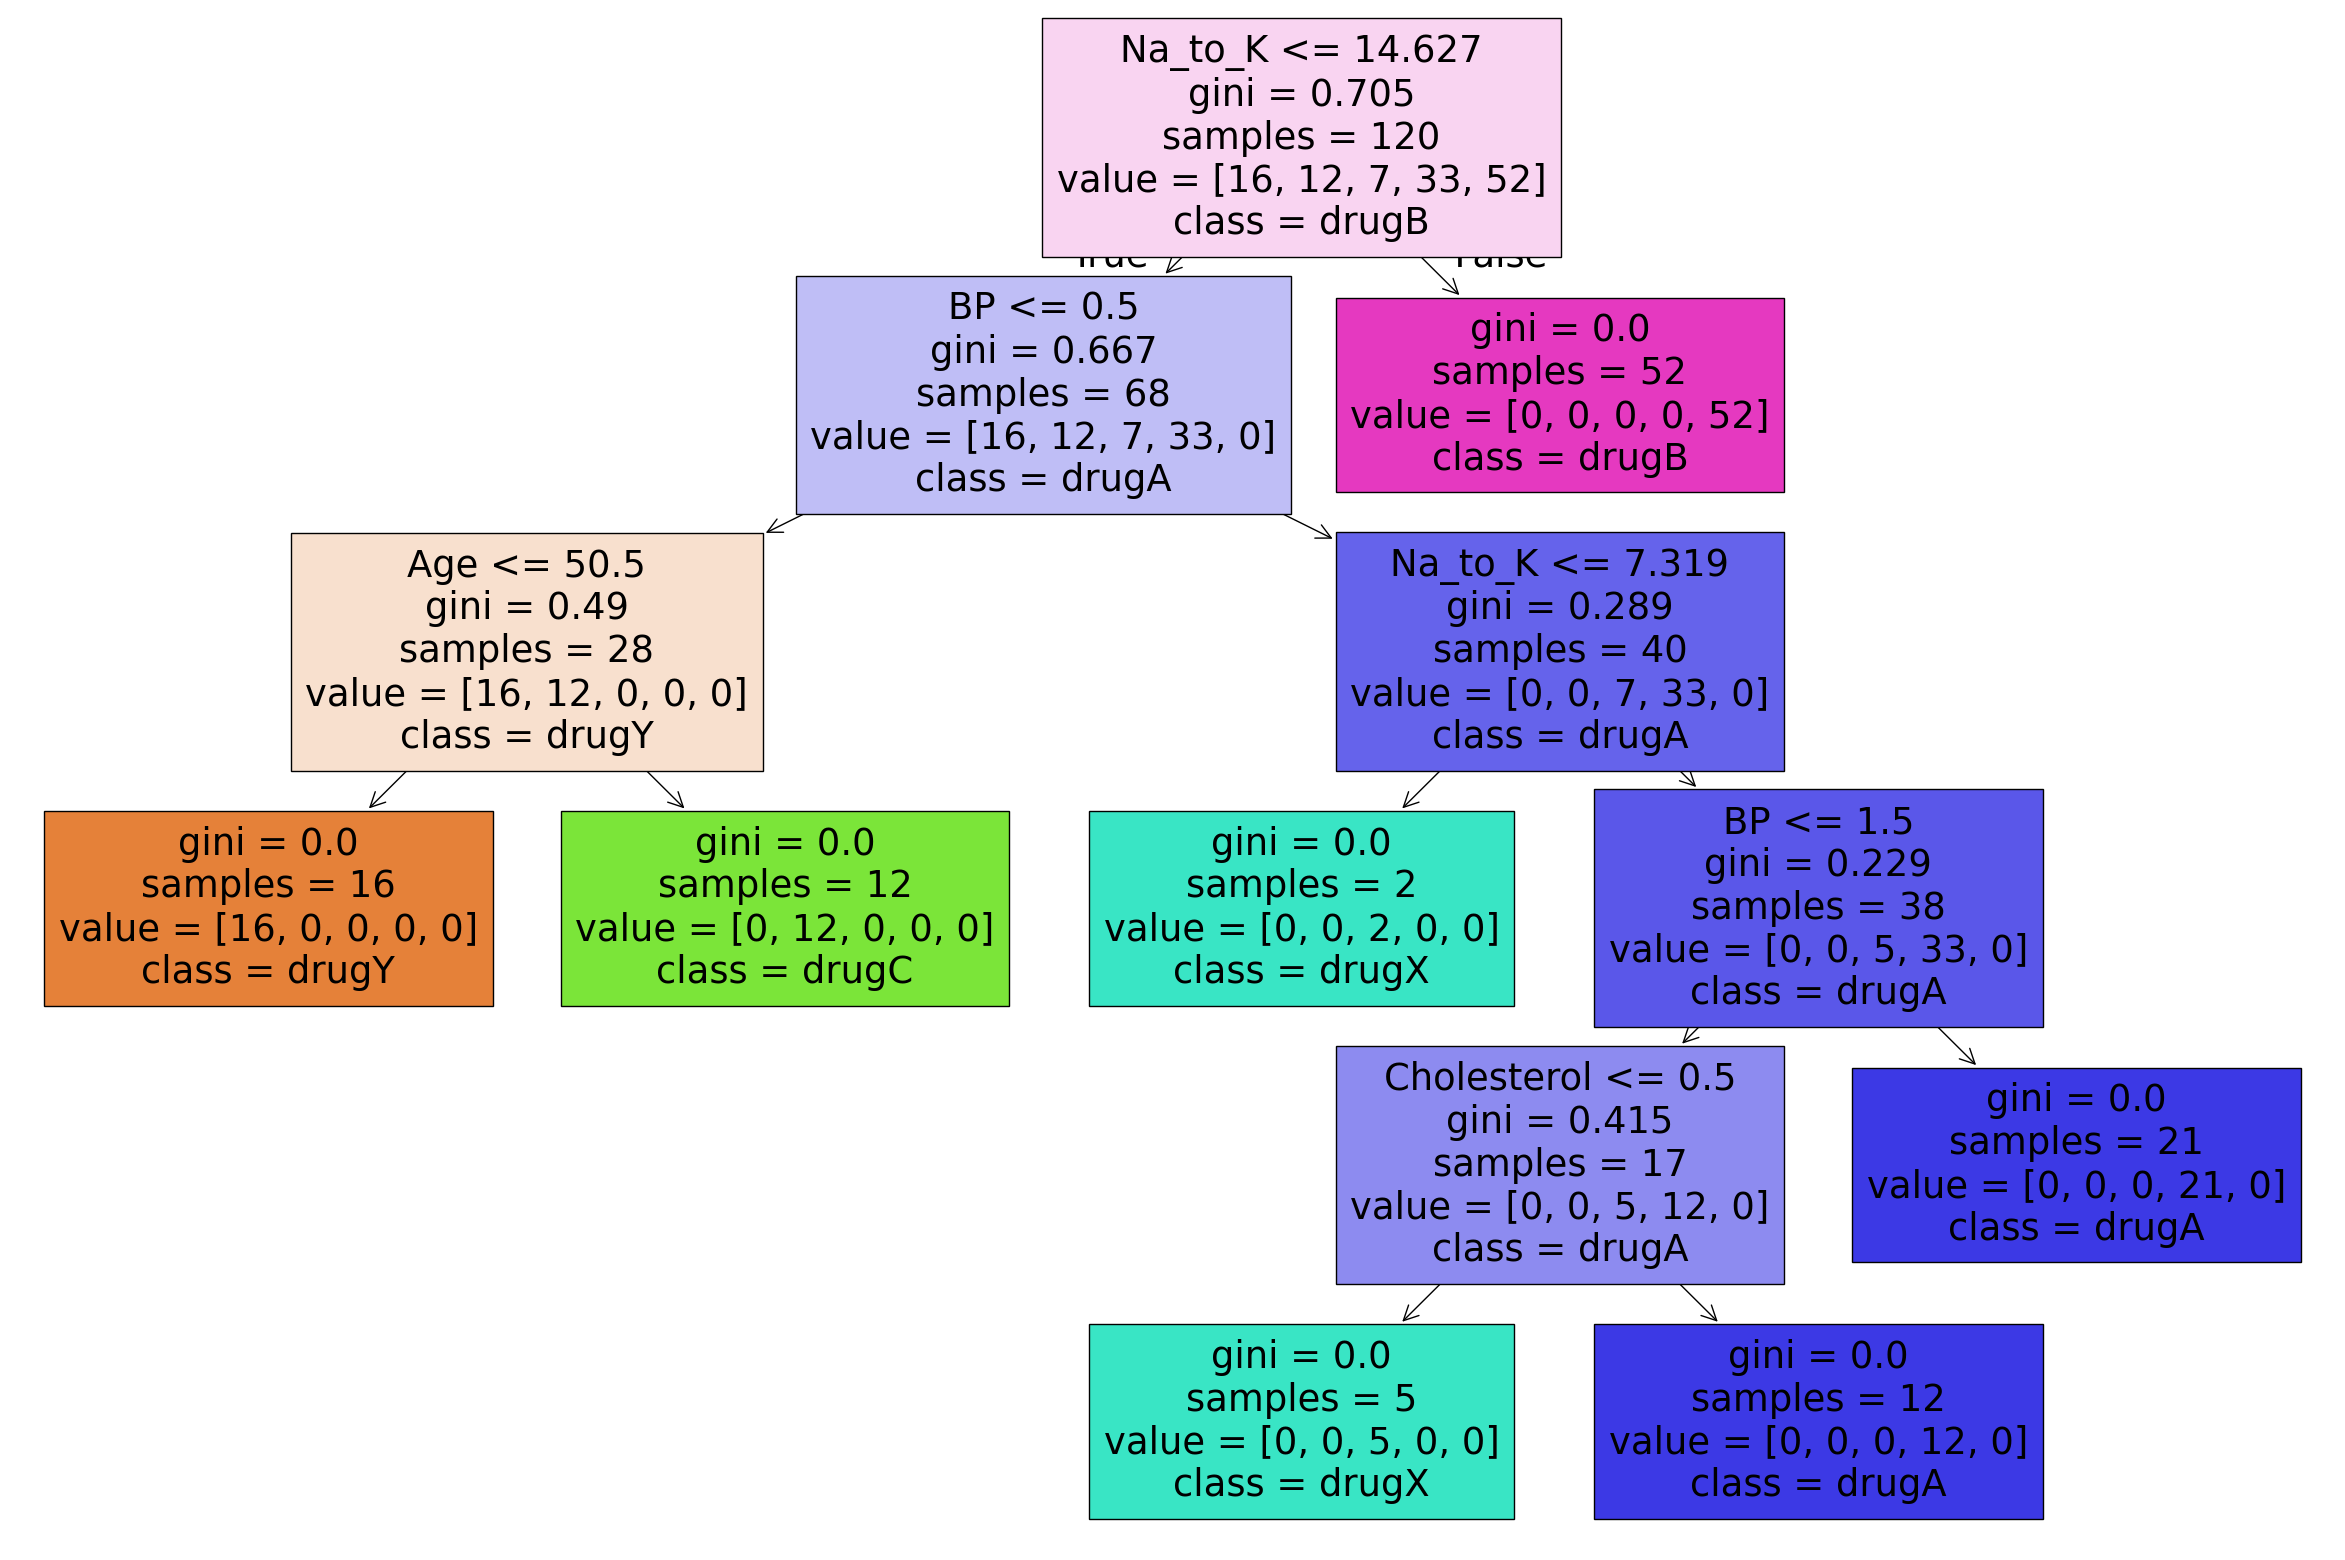

In [23]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

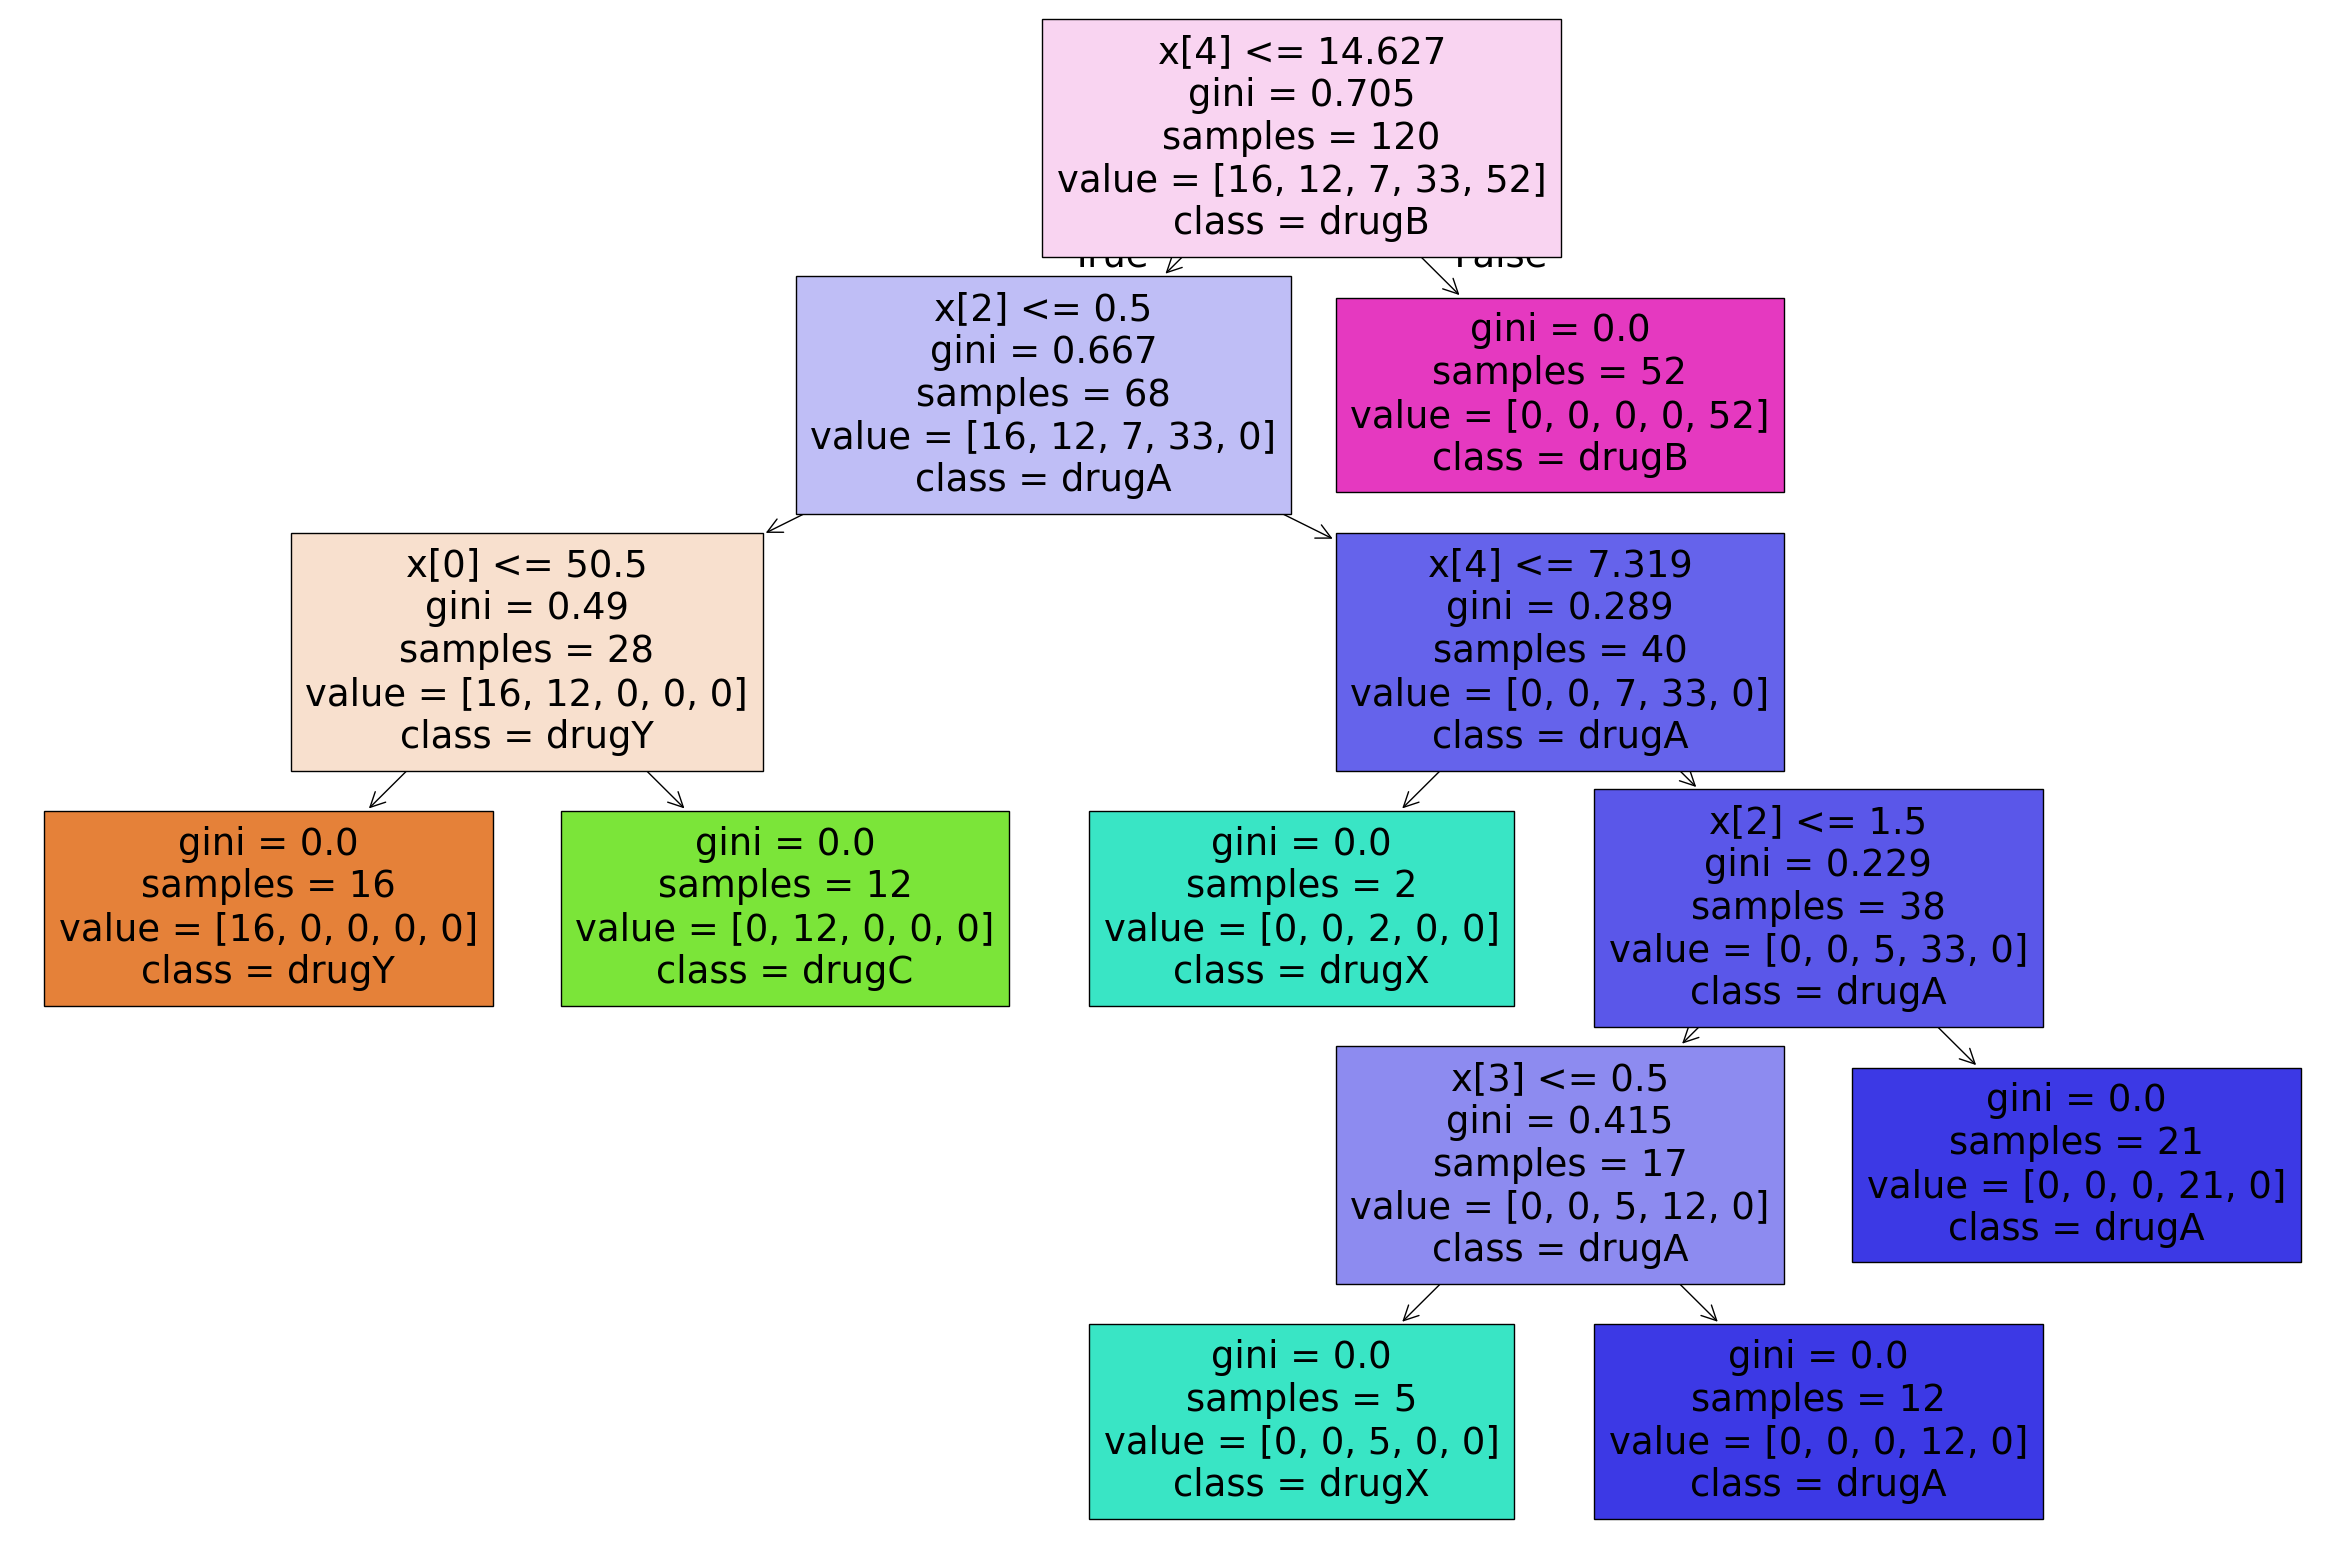

In [26]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, class_names=classes,filled=True)
plt.show()

**Hyperparameters**

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin.

k-NN uchun bu k ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

`min_impurity_decrease' - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0.

DecisionTrees's Accuracy:  0.8375


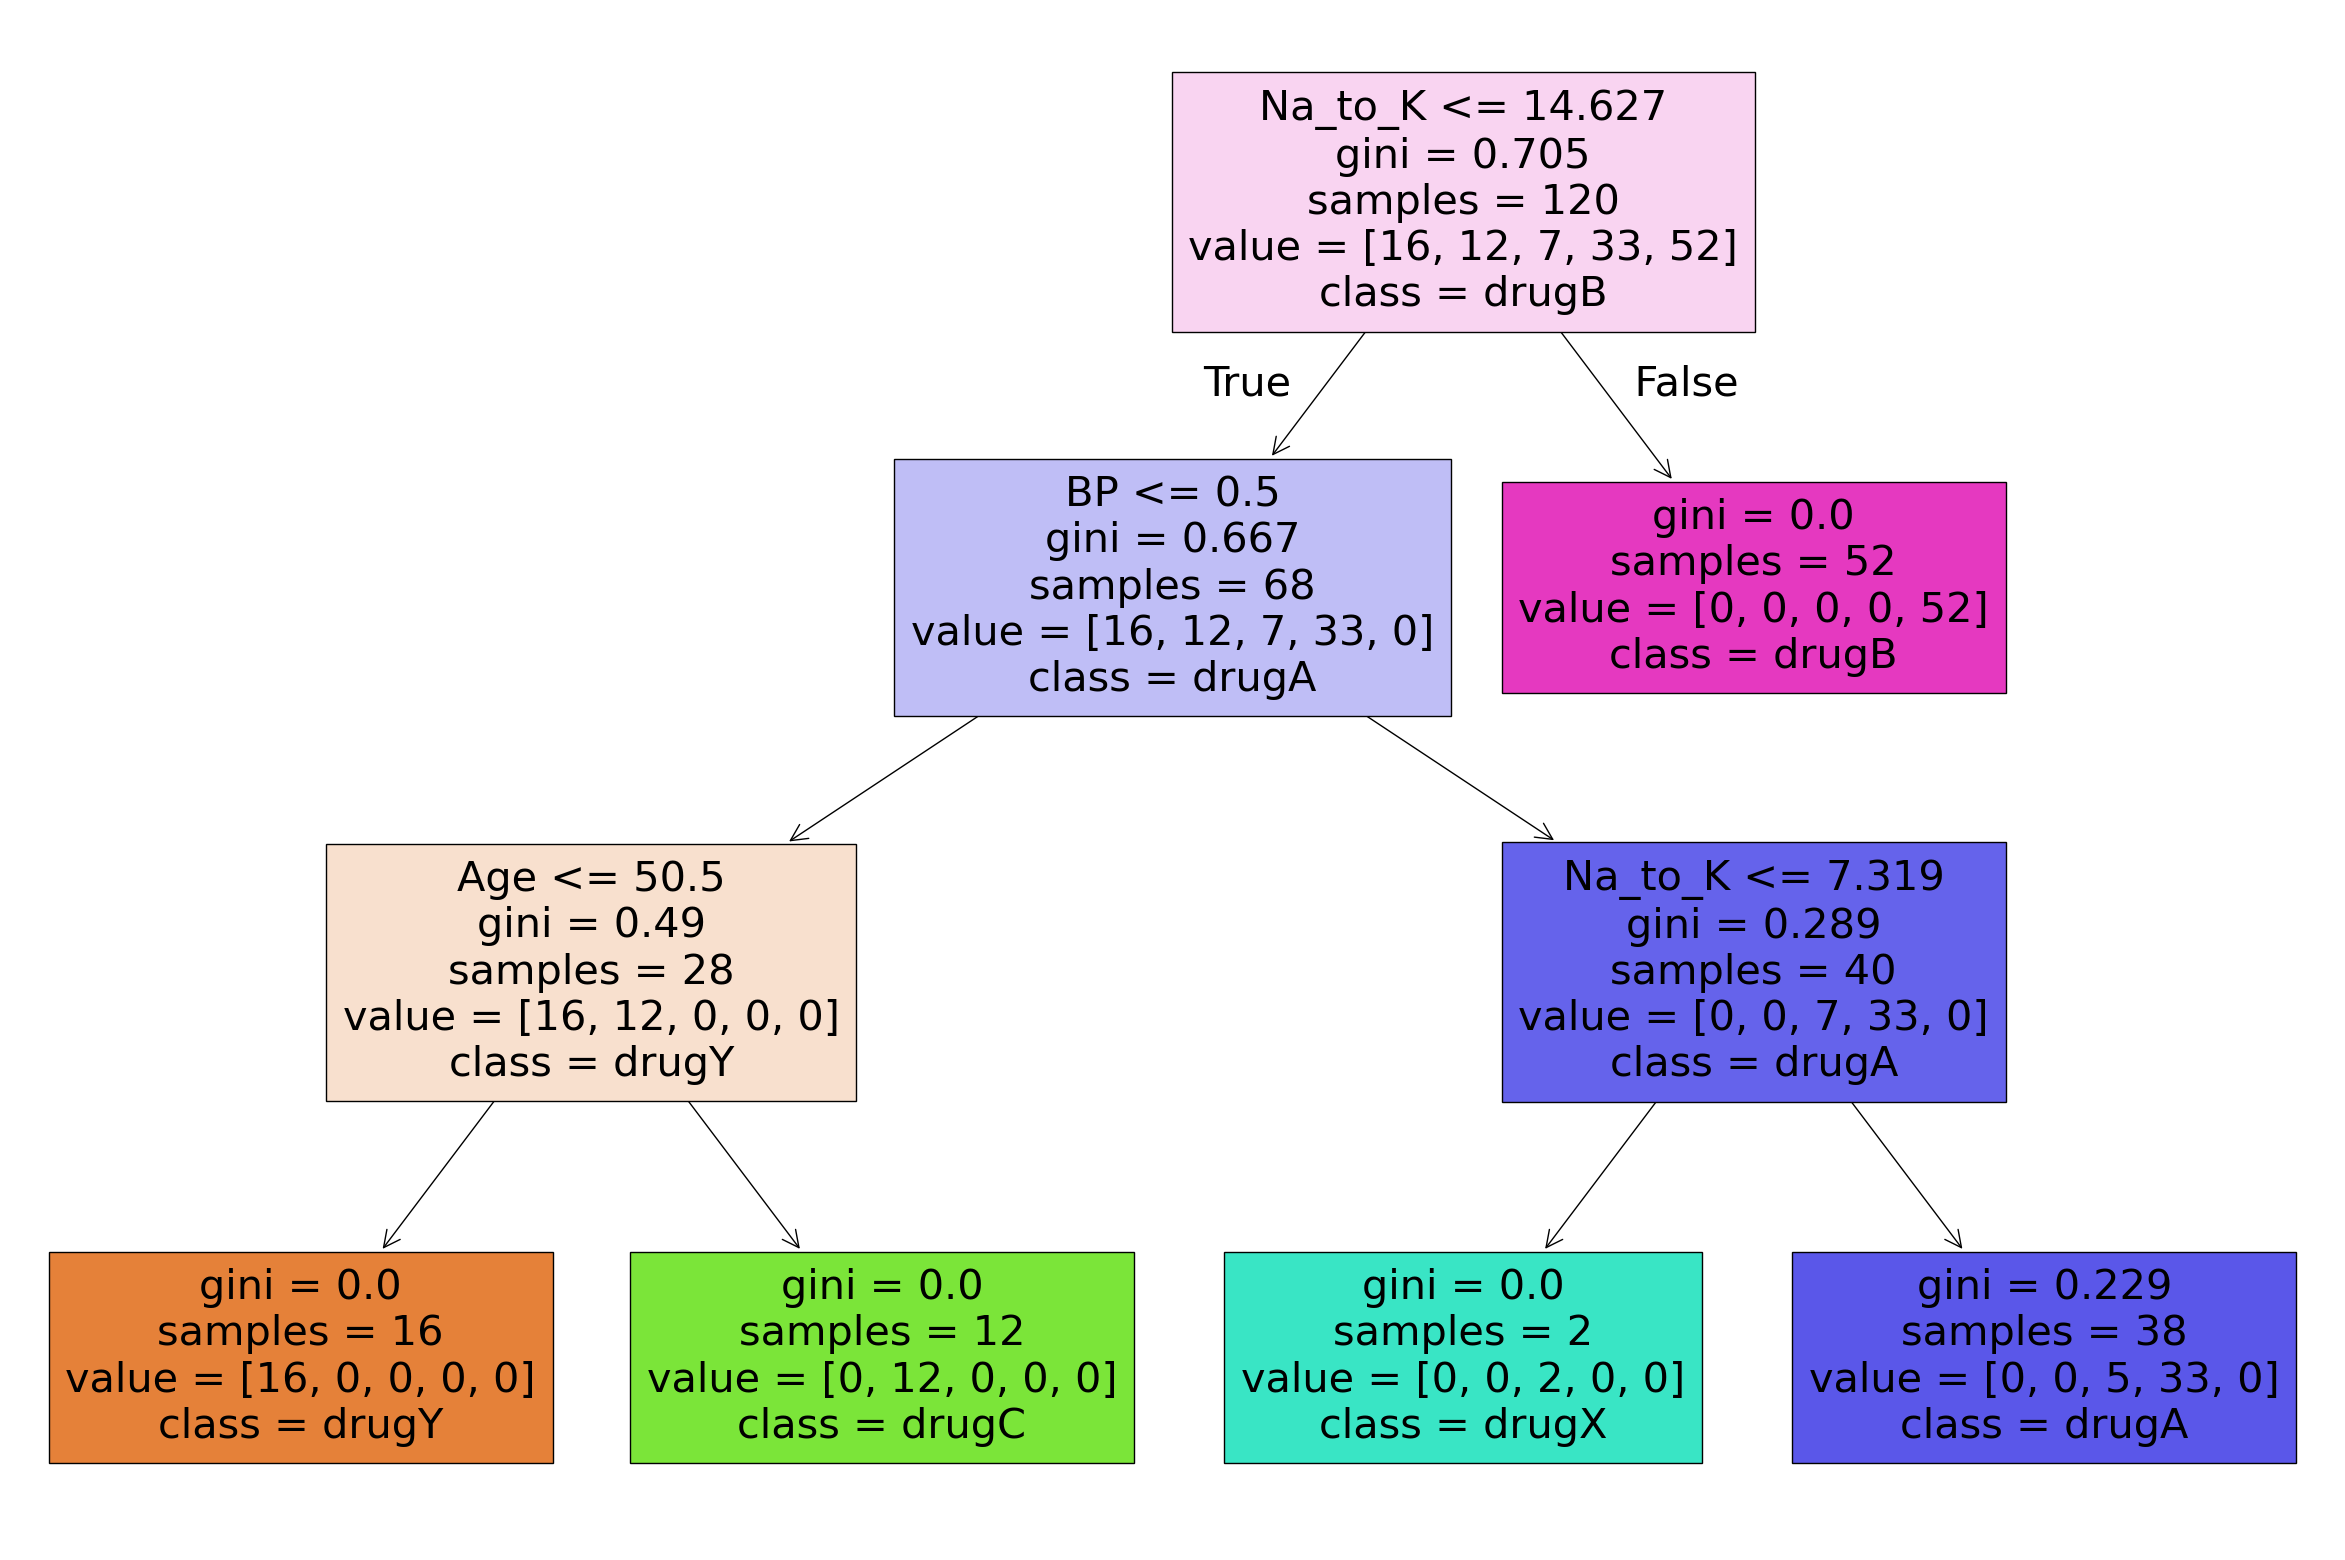

In [27]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.02)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()


max_depth - shajara qavatlari sonini ham boshqarish mumkin.

DecisionTrees's Accuracy:  0.95


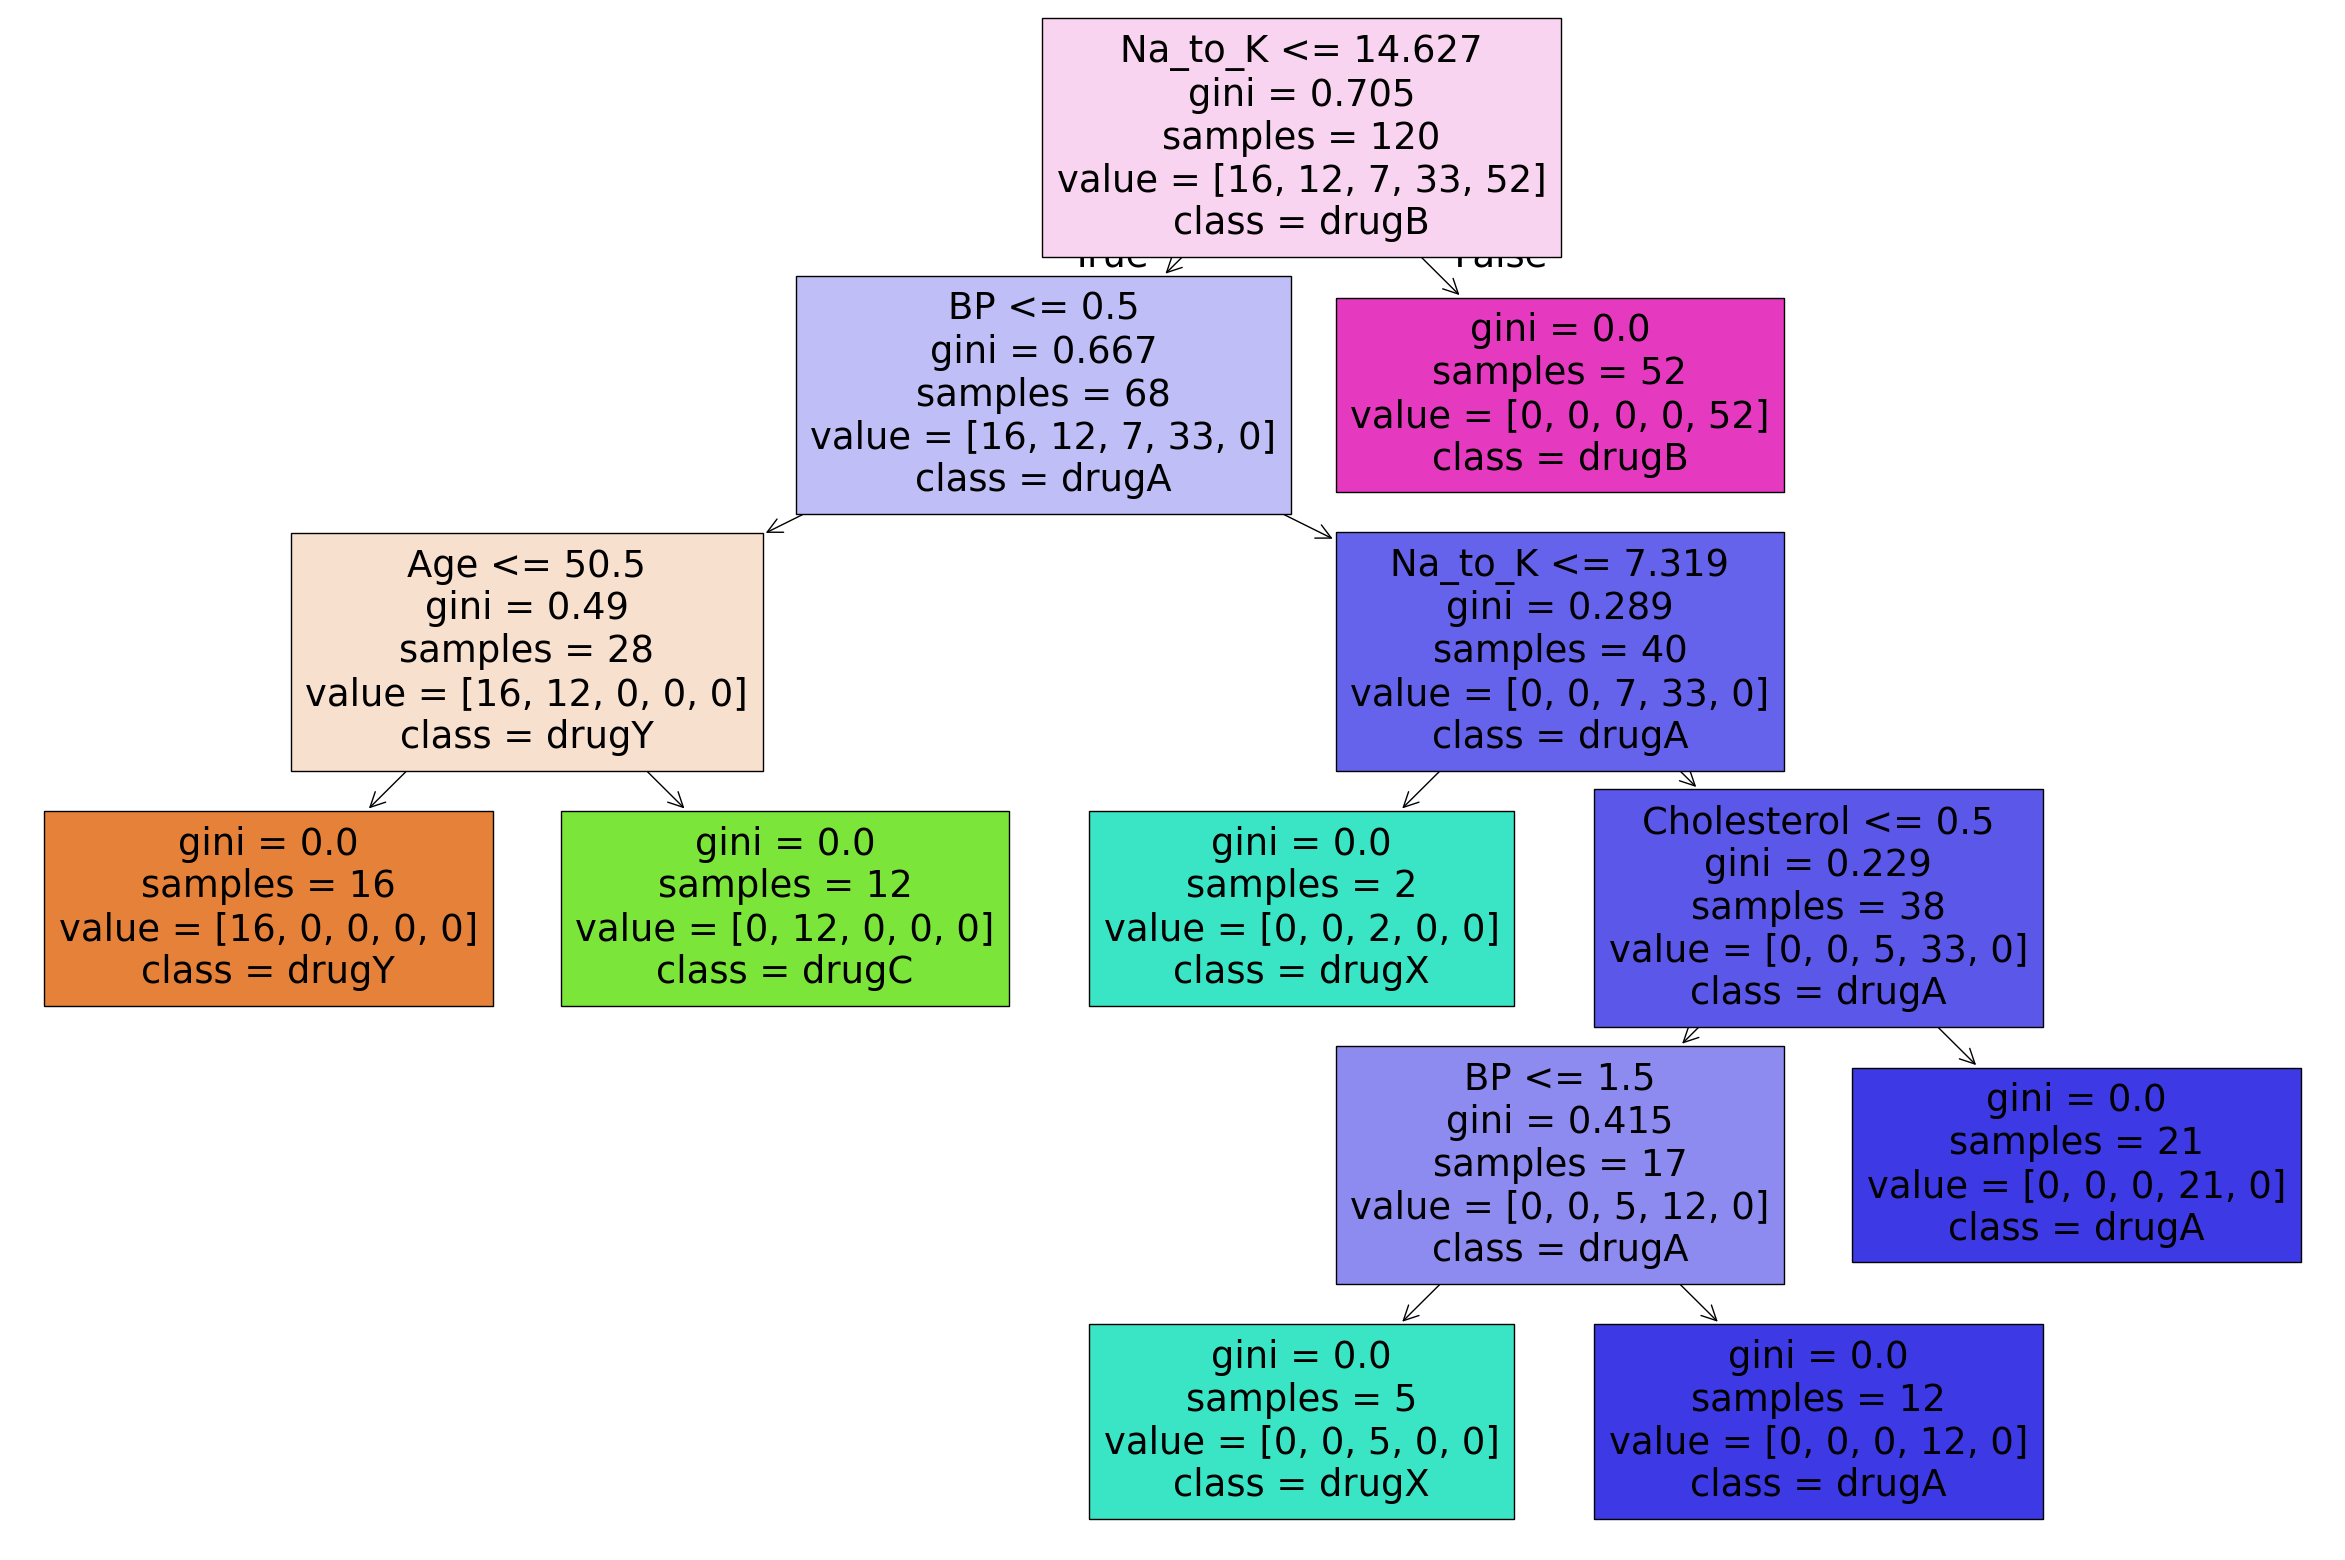

In [30]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=5)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

min_samples_leaf - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

DecisionTrees's Accuracy:  0.9875


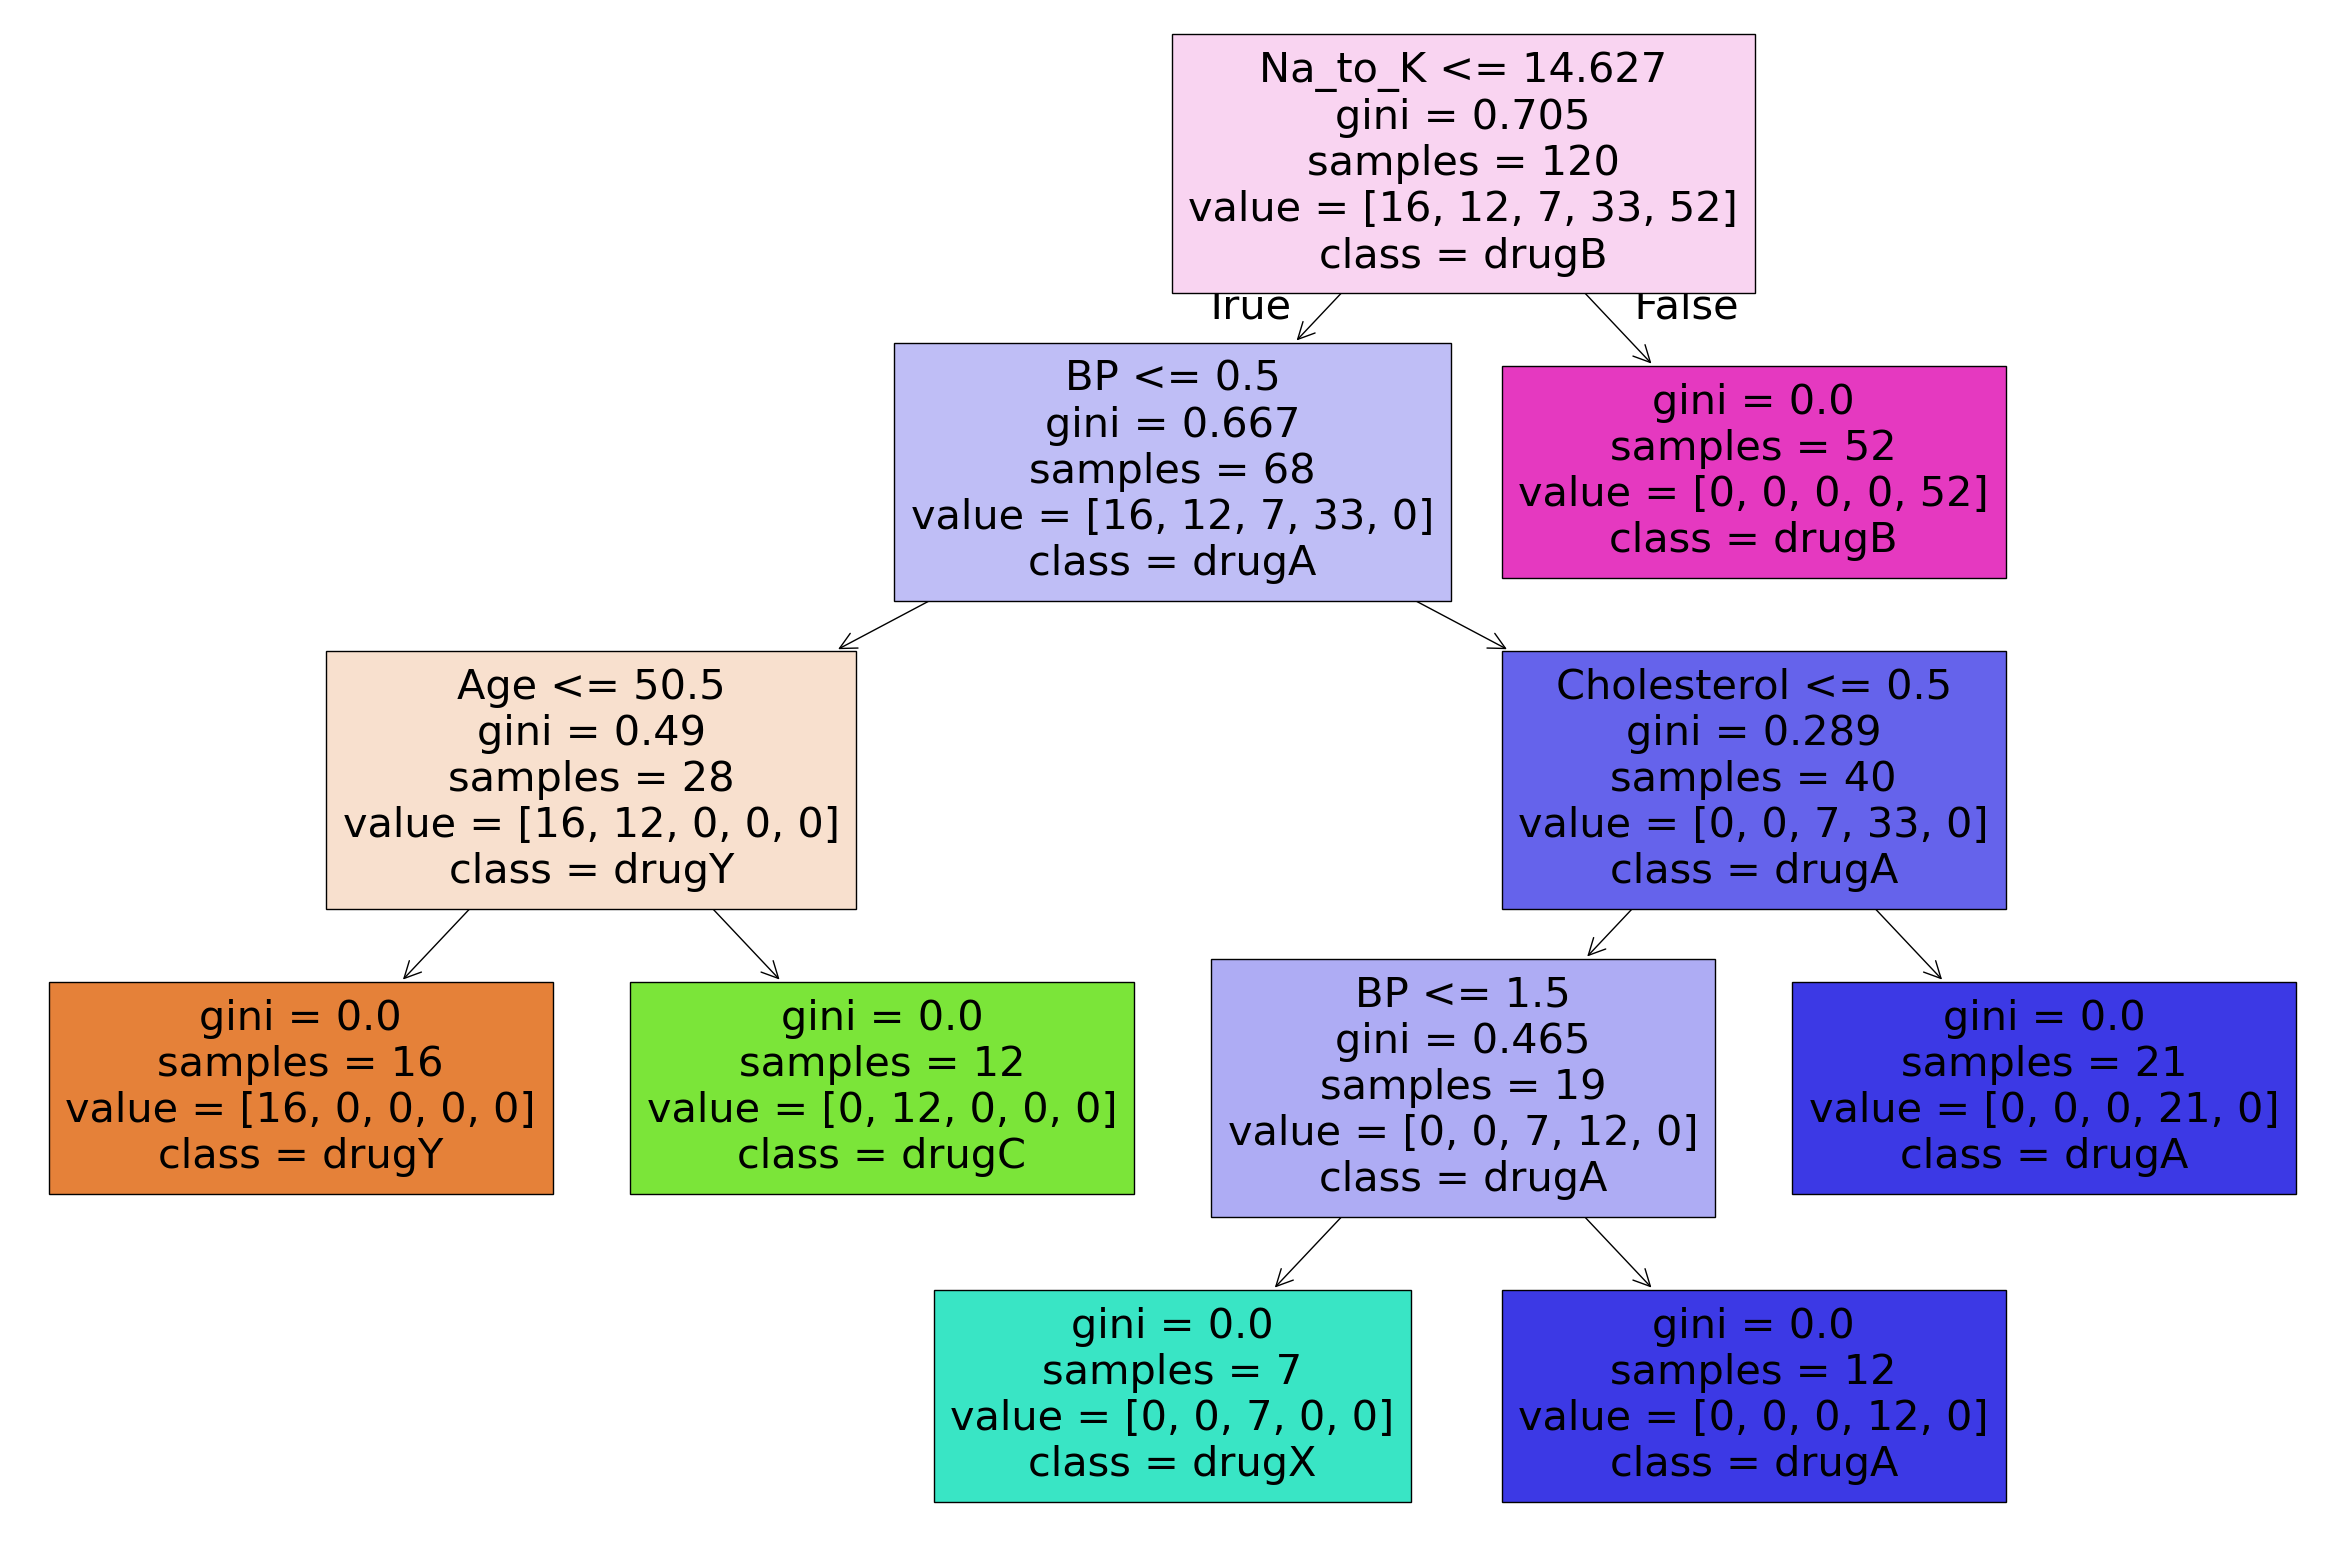

In [34]:
tree_model = DecisionTreeClassifier(min_samples_leaf=6, max_depth=5)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**Random Forest**

Hyperparameters:

n_estimators - o'rmondagi daraxtlar soni.

In [35]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [36]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875
